In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
orders=pd.read_csv("Orders.csv")

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


In [3]:
orders.head()
orders.columns
#orders.shape

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [5]:
orders.Sales

0          $221.98
1        $3,709.40
2        $5,175.17
3        $2,892.51
4        $2,832.96
5        $2,862.68
6        $1,822.08
7        $5,244.84
8          $341.96
9           $48.71
10          $17.94
11       $4,626.15
12       $2,616.96
13       $2,221.80
14       $3,701.52
15       $1,869.59
16          $12.62
17       $7,958.58
18       $2,565.59
19       $3,409.74
20       $1,977.72
21         $242.94
22       $2,754.00
23       $5,273.70
24       $1,713.84
25       $2,106.50
26       $1,715.16
27       $3,069.74
28         $247.84
29       $1,878.72
           ...    
51260        $0.44
51261      $823.96
51262      $213.48
51263       $36.48
51264       $47.14
51265      $259.96
51266       $49.30
51267       $61.44
51268        $5.34
51269      $200.40
51270       $17.88
51271       $71.12
51272       $19.32
51273        $5.92
51274       $41.64
51275        $9.61
51276       $22.72
51277       $34.13
51278       $52.59
51279        $5.36
51280       $15.98
51281       

In [292]:
import re
orders.Profit=orders.Profit.map(lambda x: float(re.sub("[$,]","",x)))
import re
orders.Sales=orders.Sales.map(lambda x: float(re.sub("[$,]","",x)))

#Dumber way
# orders["Sales"]=orders["Sales"].str.replace(",","") # remove commas
# orders["Sales"]=orders["Sales"].str.replace("$", "") #remove dollar sign
# orders["Sales"]=orders["Sales"].astype(float)


# orders["Profit"]=orders["Profit"].str.replace("$", "") 
# orders["Profit"]=orders["Profit"].str.replace(",", "") 
# orders["Profit"]=orders["Profit"].astype(float)

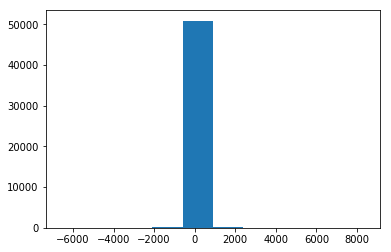

In [12]:
plt.hist(orders.Profit)
plt.show()

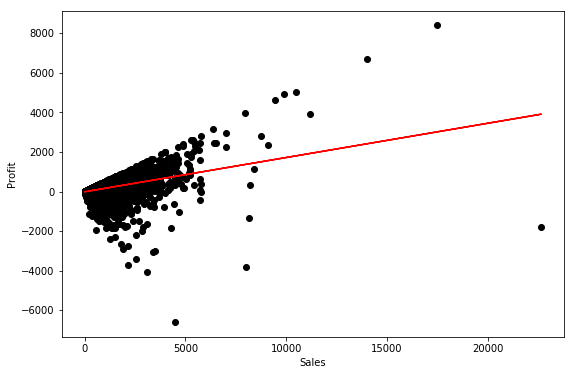

In [13]:
x = orders[["Sales"]] #MAKE IT dataframe for scikit learn
y = orders["Profit"]
## do a scatter plot with data x and y
#plt.figure(figsize=(9, 6))
#plt.scatter(x, y, c='k')
#plt.xlabel('Sales')
#plt.ylabel('Profit')
#plt.show()

from sklearn import linear_model
ols= linear_model.LinearRegression()
ols.fit(X=x,y=y)
plt.figure(figsize=(9, 6))
plt.scatter(x, y, c='k')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.plot(x, ols.predict(x), c='r', lw=1.5, label='Predicted relation')
plt.show()

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [15]:
orders["Order.Date"]
orders["Order.Date"]=pd.to_datetime(orders["Order.Date"]) #use pandas to convert to datetime
orders["Ship.Date"]=pd.to_datetime(orders["Ship.Date"])

                                   

In [16]:
orders["Order.Year"]=orders["Order.Date"].dt.year
orders["Order.Month"]=orders["Order.Date"].dt.month
orders["Order.Day"]=orders["Order.Date"].dt.dayofyear

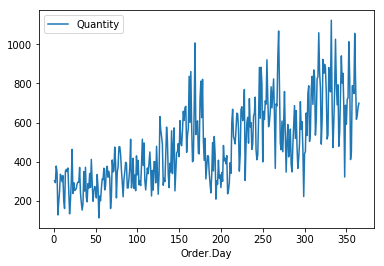

In [17]:
trenddata=orders.groupby(["Order.Day"])[["Quantity"]].sum()
trenddata.plot()
plt.show()

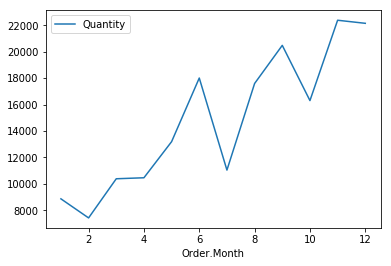

In [19]:
orders.groupby(["Order.Month"])[["Quantity"]].sum().plot()

In [35]:
orders.groupby(['Category'])

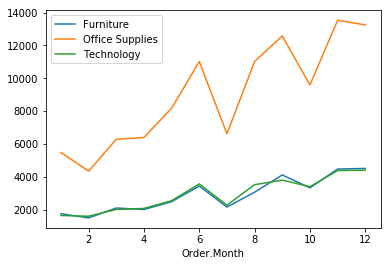

In [36]:
for index, group in orders.groupby(['Category']):
    group_agg = group.groupby(['Order.Month'])['Quantity'].sum()
    group_agg.plot(y='Quantity', label=index, legend=True)

<Figure size 432x288 with 0 Axes>

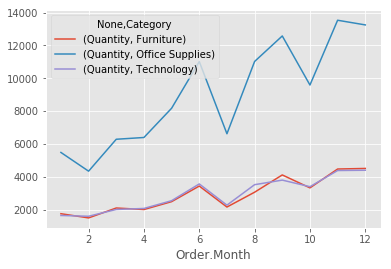

In [45]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

plt.figure()
orders.groupby(["Order.Month","Category"])[["Quantity"]].sum().unstack().plot()

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [47]:
returns=pd.read_csv("Returns.csv")
#returns=returns.rename(columns = {'Order ID':'Order.ID'})
returns.shape

(1079, 3)

In [48]:
returns=returns.drop("Region",axis=1)

In [56]:
combined=pd.merge(orders,returns,left_on="Order.ID", right_on="Order ID",how="outer")

In [61]:
#1How much profit did we lose due to returns each year?
combined[combined["Returned"]=="Yes"][["Profit","Order.Year"]].groupby("Order.Year").sum()

,Profit
Order.Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [62]:
#returned customers
returned=combined[combined["Returned"]=="Yes"]

In [63]:
#How many customer returned more than once? more than 5 times?
returned.groupby("Customer.Name").count().iloc[:,1].shape #593
sum(returned.groupby("Customer.ID")["Customer.ID"].count()>5)#.iloc[:,1]>5) #124

46

In [64]:
returned.shape

(2220, 29)

In [65]:
#Which regions are more likely to return orders?
returned.groupby("Region")["Region"].count().sort_values(ascending=False)

Region
Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Canada                15
Central Asia           9
Name: Region, dtype: int64

In [66]:
#Which categories (sub-categories) of products are more likely to be returned?
returned.groupby(["Category","Sub.Category"])[["Category","Sub.Category"]].count().sort_values(by="Category",ascending=False)

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'Category' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


Category  Sub.Category
Category        Sub.Category                        
Office Supplies Binders            269           269
                Art                217           217
                Storage            212           212
                Paper              150           150
Furniture       Chairs             147           147
Technology      Phones             145           145
                Accessories        138           138
Office Supplies Labels             137           137
Furniture       Furnishings        135           135
                Bookcases          104           104
Office Supplies Supplies           103           103
                Fasteners          102           102
                Envelopes           99            99
Technology      Copiers             99            99
                Machines            63            63
Office Supplies Appliances          59            59
Furniture       Tables              41            41

## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


In [71]:
#combined["Returned"]=pd.get_dummies(combined["Returned"])
#combined=combined.rename(index=str, columns={"Returned": "Not_returned"})
#combined.columns
#combined[combined["Returned"]<1]#=(combined["Returned"]+2)
combined["Returned"]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
51260    0
51261    0
51262    0
51263    0
51264    0
51265    0
51266    0
51267    0
51268    1
51269    0
51270    0
51271    0
51272    0
51273    0
51274    0
51275    0
51276    0
51277    0
51278    0
51279    0
51280    0
51281    0
51282    0
51283    0
51284    0
51285    0
51286    0
51287    0
51288    0
51289    0
Name: Returned, Length: 51290, dtype: uint8

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [72]:
combined["Process.Time"]=combined["Ship.Date"].dt.dayofyear-combined["Order.Date"].dt.dayofyear
combined["Process.Time"]

0        2
1        2
2        2
3        2
4        2
5        2
6        1
7        1
8        1
9        1
10       1
11       2
12       1
13       3
14       3
15       3
16       3
17       3
18       2
19       2
20       4
21       1
22       1
23       1
24       3
25       2
26       2
27       2
28       2
29       2
        ..
51260    5
51261    6
51262    5
51263    5
51264    5
51265    4
51266    2
51267    5
51268    4
51269    6
51270    6
51271    6
51272    2
51273    6
51274    0
51275    0
51276    5
51277    5
51278    5
51279    5
51280    6
51281    6
51282    1
51283    3
51284    5
51285    2
51286    5
51287    0
51288    4
51289    4
Name: Process.Time, Length: 51290, dtype: int64

#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [73]:
combined["Times.returned"]=combined.groupby("Product.ID")["Returned"].transform("sum")
combined["Times.returned"]


0         0
1         0
2         2
3         1
4         0
5         0
6         2
7         1
8         2
9         3
10        2
11        0
12        0
13        1
14        1
15        0
16        2
17        0
18        5
19        1
20        0
21        1
22        0
23        0
24        0
25        0
26        0
27        1
28        1
29        1
         ..
51260     0
51261     2
51262     0
51263     0
51264     0
51265     1
51266     2
51267     1
51268     2
51269    12
51270     0
51271     0
51272     1
51273     0
51274     0
51275     0
51276     0
51277     1
51278     0
51279     1
51280     0
51281     0
51282     0
51283     1
51284     0
51285     2
51286     1
51287     0
51288     0
51289     0
Name: Times.returned, Length: 51290, dtype: uint8

### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

In [83]:
combined.columns[combined.isna().any()==True]#Postal.Code', 'Order ID
#combined.drop(["Postal.Code","Order ID"], axis = 1, inplace = True)
combined.drop(["Order.Date","Ship.Date"], axis = 1, inplace = True)

In [84]:
combined.dtypes

Row.ID              int64
Order.ID            int64
Ship.Mode           int64
Customer.ID         int64
Customer.Name       int64
Segment             int64
City                int64
State               int64
Country             int64
Region              int64
Market              int64
Product.ID          int64
Category            int64
Sub.Category        int64
Product.Name        int64
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority      int64
Order.Year          int64
Order.Month         int64
Order.Day           int64
Returned            uint8
Process.Time        int64
Times.returned      uint8
dtype: object

In [80]:
class LabelCountEncoder(object):
    def __init__(self):
        self.count_dict = {}
    
    def fit(self, column):
        # This gives you a dictionary with level as the key and counts as the value
        count = column.value_counts().to_dict()
        # We want to rank the key by its value and use the rank as the new value
        # Your code here
        self.count_dict=dict(zip(count,range(len(count),0,-1)))
        
        
    
    def transform(self, column):
        # If a category only appears in the test set, we will assign the value to zero.
        missing = 0
        # Your code here
        return column.map(lambda x: self.count_dict.get(x,missing))
        
    
    def fit_transform(self, column):
        self.fit(column)
        return self.transform(column)

In [81]:
for c in combined.columns:
    if combined[c].dtype == 'object':
        lce = LabelCountEncoder()
        combined[c] = lce.fit_transform(combined[c])

In [342]:
# for c in combined.columns:
#     if combined[c].dtype == 'datetime64[ns]':
#         combined.drop([c], axis = 1, inplace = True)


In [343]:
combined.dtypes

Order.Date          int64
Postal.Code       float64
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
year                int64
month               int64
Returned            uint8
Process.Time      float64
Times.returned      uint8
dtype: object

In [85]:
y=combined["Returned"]
x=combined.loc[:,combined.columns!="Returned"]

In [97]:
from sklearn.model_selection import StratifiedKFold
X = x
y = y
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)  
np.random.seed(1)
# StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]





StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [88]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()
logit_1.set_params(C=1e4)
logit_1.fit(X_train, y_train)
y_predict = logit_1.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

array([[9811,    3],
       [ 444,    0]], dtype=int64)

In [90]:
roc_auc_score(y_test, y_predict)

0.49984715712247807

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [92]:
confusion_matrix(y_test, y_predict)

array([[7384, 2430],
       [ 122,  322]], dtype=int64)

In [93]:
roc_auc_score(y_test, y_predict)

0.7388098818198675

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.